<a href="https://colab.research.google.com/github/niharikabulani/DAV-LAB/blob/main/exp2_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt

In [6]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split  # Import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


In [7]:
df = pd.read_csv('ds_salaries.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [8]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB
None
       Unnamed: 0    work_year        salary  salary_in_usd  remote_ratio
count  607.000000   607.000000  6.070000e+02     607.000000     607.00000
mean   303.000000  

In [11]:
df = df[["salary_in_usd", "work_year","company_size"]]
df.head(10)


,salary_in_usd,work_year,company_size
0,79833,2020,L
1,260000,2020,S
2,109024,2020,M
3,20000,2020,S
4,150000,2020,L
5,72000,2020,L
6,190000,2020,S
7,35735,2020,L
8,135000,2020,L
9,125000,2020,S


In [12]:
df.tail()

,salary_in_usd,work_year,company_size
602,154000,2022,M
603,126000,2022,M
604,129000,2022,M
605,150000,2022,M
606,200000,2022,L


In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
salary_in_usd,607.0,112297.869852,70957.259411,2859.0,62726.0,101570.0,150000.0,600000.0
work_year,607.0,2021.405272,0.692133,2020.0,2021.0,2022.0,2022.0,2022.0


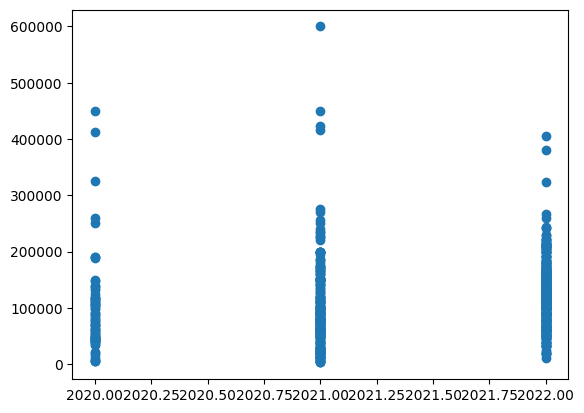

In [16]:
plt.scatter(df['work_year'], df['salary_in_usd'])

(array([149., 228., 149.,  61.,  10.,   2.,   4.,   3.,   0.,   1.]),
 array([  2859. ,  62573.1, 122287.2, 182001.3, 241715.4, 301429.5,
        361143.6, 420857.7, 480571.8, 540285.9, 600000. ]),
 <BarContainer object of 10 artists>)

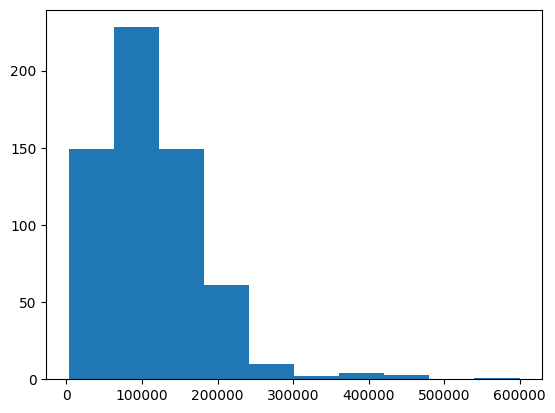

In [17]:
plt.hist(df["salary_in_usd"])

In [18]:
model = LinearRegression()
model.fit(df["salary_in_usd"].values.reshape(-1, 1), df["work_year"])

LinearRegression()

Text(0.01, 0.9, 'y = 2021.219 + 0.0 * x')

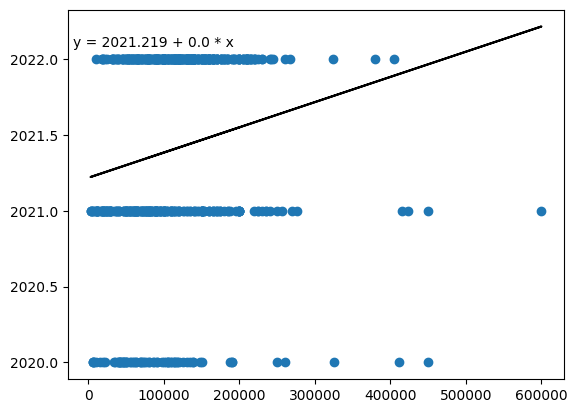

In [19]:
y_pred = model.predict(df["salary_in_usd"].values.reshape(-1, 1))
plt.scatter(df['salary_in_usd'], df['work_year'])
plt.plot(df["salary_in_usd"], y_pred, color="Black")
plt.text(0.01, 0.9, f"y = {round(model.intercept_, 3)} + {round(model.coef_[0], 3)} * x", transform=plt.gca().transAxes)

In [1]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
df <- read.csv("ds_salaries.csv")

In [3]:
df = select(df,c("work_year", "salary_in_usd"))
head(df)

,work_year,salary_in_usd
,<int>,<int>
1,2020,79833
2,2020,260000
3,2020,109024
4,2020,20000
5,2020,150000
6,2020,72000


In [4]:
summary(df)

   work_year    salary_in_usd   
 Min.   :2020   Min.   :  2859  
 1st Qu.:2021   1st Qu.: 62726  
 Median :2022   Median :101570  
 Mean   :2021   Mean   :112298  
 3rd Qu.:2022   3rd Qu.:150000  
 Max.   :2022   Max.   :600000  

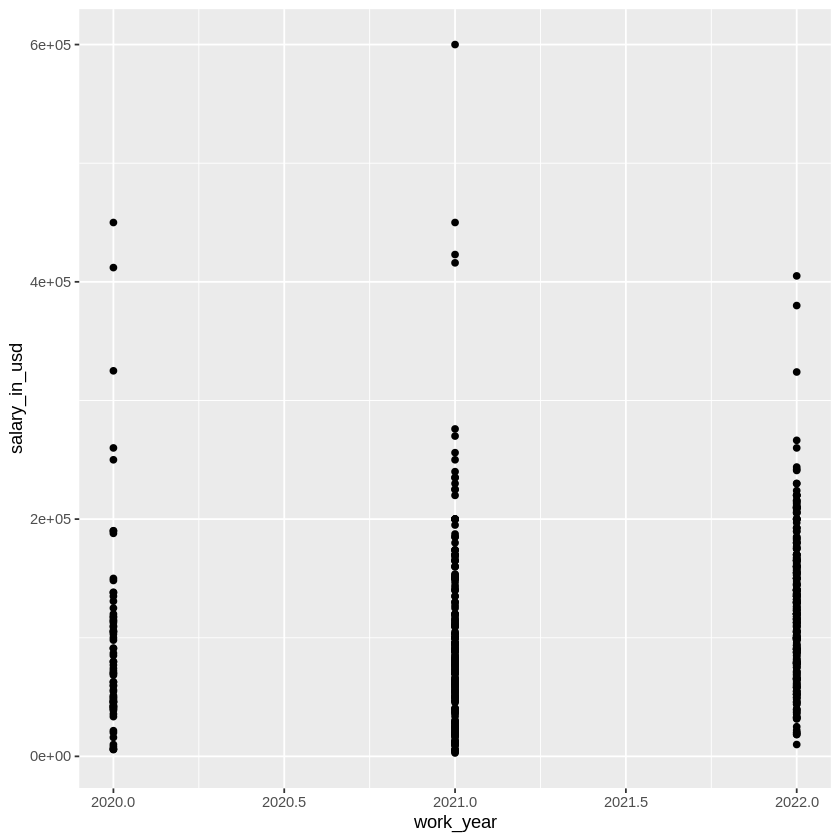

In [5]:
ggplot(df, aes(x=work_year, y=salary_in_usd)) +
    geom_point()

In [6]:
model = lm(salary_in_usd ~ work_year, data=df)
summary(model)


Call:
lm(formula = salary_in_usd ~ work_year, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-112693  -45637   -9793   34786  494786 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -35219689    8301899  -4.242 2.56e-05 ***
work_year       17479       4107   4.256 2.41e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 69980 on 605 degrees of freedom
Multiple R-squared:  0.02907,	Adjusted R-squared:  0.02746 
F-statistic: 18.11 on 1 and 605 DF,  p-value: 2.413e-05


In [7]:
pred <- predict(model, data = df$work_year)

[1] "y = -35219688.935468 + 17478.922855 * x"

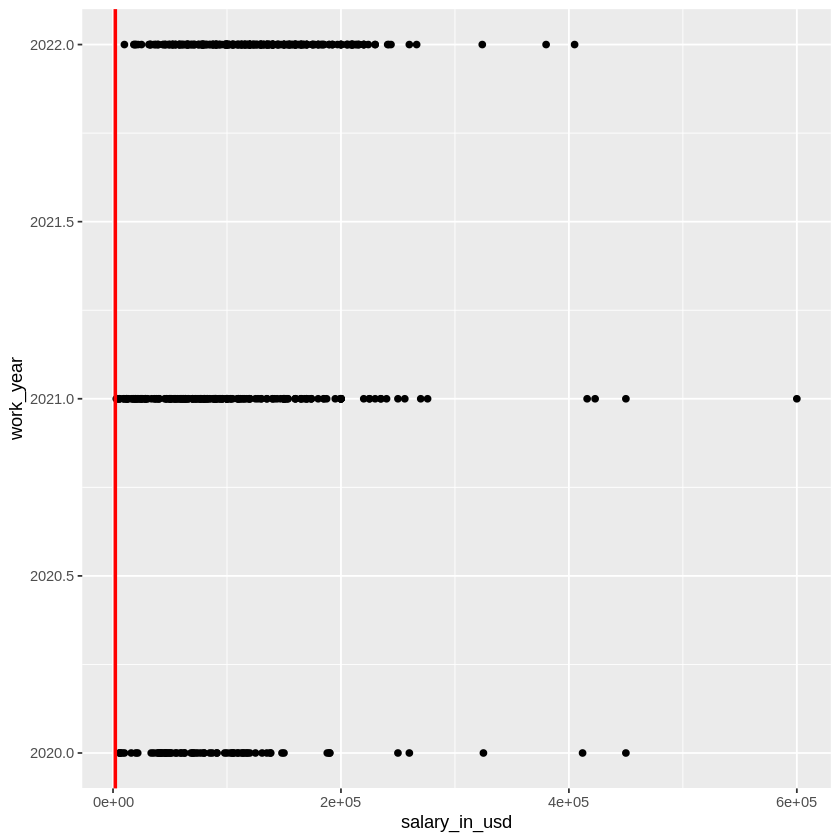

In [8]:
ggplot(df, aes(x=salary_in_usd, y=work_year)) +
    geom_point() +
      geom_abline(slope=model$coefficients[2],
              intercept=model$coefficients[1],
              color="Red",
              linewidth=1)
sprintf("y = %f + %f * x", model$coefficients[1], model$coefficients[2])